In [48]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

## Importando Data


In [49]:
df=pd.read_csv("../Data/Dataframelimpa_sem_latlong.csv")


df["product_category_name"]=pd.Categorical(df["product_category_name"])
df["product_category_name"]=df["product_category_name"].cat.codes

df["customer_zip_code_prefix"]=pd.Categorical(df["customer_zip_code_prefix"])
df["customer_zip_code_prefix"]=df["customer_zip_code_prefix"].cat.codes

df["seller_zip_code_prefix"]=pd.Categorical(df["seller_zip_code_prefix"])
df["seller_zip_code_prefix"]=df["seller_zip_code_prefix"].cat.codes

df=df[["product_category_name","delivery_time","product_weight_g","product_length_cm","product_height_cm","product_width_cm"
       ,"seller_zip_code_prefix","customer_zip_code_prefix","price","freight_value"]]

df

,product_category_name,delivery_time,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix,customer_zip_code_prefix,price,freight_value
0,18,7.61,650.0,28.0,9.0,14.0,1022,5985,58.90,13.29
1,31,7.95,3050.0,33.0,13.0,33.0,1152,6824,199.00,17.87
2,40,6.67,450.0,24.0,8.0,15.0,773,7223,21.90,12.69
3,39,8.42,200.0,27.0,5.0,20.0,2,4592,19.90,11.85
4,8,9.98,2000.0,30.0,12.0,16.0,218,3467,145.95,11.65
...,...,...,...,...,...,...,...,...,...,...
64873,25,20.91,175.0,20.0,20.0,20.0,624,8579,180.00,48.14
64874,31,4.72,750.0,30.0,30.0,11.0,235,1372,89.90,11.83
64875,21,21.08,2700.0,60.0,15.0,15.0,348,8782,229.90,44.02
64876,21,4.80,967.0,21.0,24.0,19.0,1292,1312,99.90,16.95


## Aplicando o modelo

In [50]:
x=df.drop(columns="delivery_time")
y=df["delivery_time"]

In [51]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=11)
reg=xgb.XGBRegressor(n_estimators=1000, early_stopping_rounds=50, learning_rate=0.01)
                     
reg.fit(x_train,y_train,
        eval_set=[(x_train,y_train),(x_test,y_test)],
        verbose=100)


[0]	validation_0-rmse:5.58918	validation_1-rmse:5.62414
[100]	validation_0-rmse:4.65779	validation_1-rmse:4.72396
[200]	validation_0-rmse:4.45096	validation_1-rmse:4.54833
[300]	validation_0-rmse:4.36577	validation_1-rmse:4.49120
[400]	validation_0-rmse:4.30818	validation_1-rmse:4.46182
[500]	validation_0-rmse:4.26695	validation_1-rmse:4.44187
[600]	validation_0-rmse:4.23202	validation_1-rmse:4.42557
[700]	validation_0-rmse:4.20044	validation_1-rmse:4.41323
[800]	validation_0-rmse:4.17233	validation_1-rmse:4.40365
[900]	validation_0-rmse:4.14925	validation_1-rmse:4.39650
[999]	validation_0-rmse:4.12747	validation_1-rmse:4.39042


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=50,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=1000, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

## Feature Importance

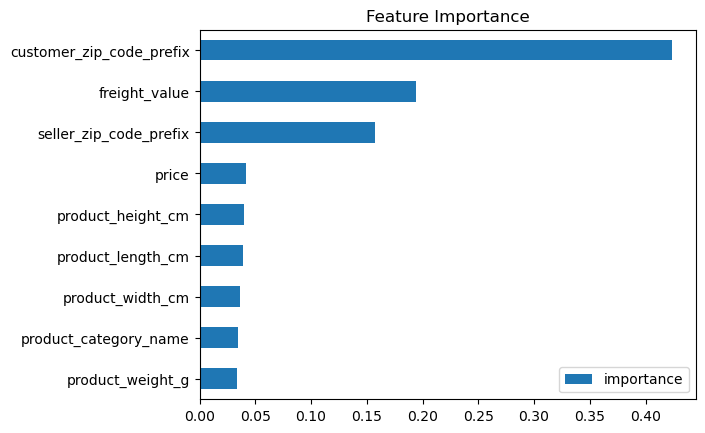

In [52]:
fi=pd.DataFrame(data=reg.feature_importances_,
                index=reg.feature_names_in_,
                columns=["importance"])
fi.sort_values(by="importance").plot(kind="barh",title="Feature Importance")
plt.show()

In [53]:
y_pred=reg.predict(x_test)

In [54]:
mse=mean_squared_error(y_test,y_pred)
mse

19.275819357547917

In [55]:
rmse = np.sqrt(mse)
print(rmse)

4.39042359659611
